<h2 style="text-align: left; color: lightblue;font-size: 25px"><span> <strong>1. Analyse des données </strong></span></h2>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.stats import skew

from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer

In [4]:
dataset = pd.read_csv(r'C:\Users\user\Desktop\Scolarite\3 - E5e\S9\Projet_Fin_Etude\creditcard_2023.csv')

In [5]:
duplicate_count = dataset.duplicated().sum()
print("Nombre de doublons :", duplicate_count)

Nombre de doublons : 0


In [6]:
dataset.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [8]:
dataset.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [9]:
"Forme du dataset :", dataset.shape

('Forme du dataset :', (568630, 31))

In [10]:
class_counts = dataset['Class'].value_counts()

class_percentages = class_counts / len(dataset) * 100

print("Répartition des classes en pourcentage :")
print(class_percentages)

Répartition des classes en pourcentage :
Class
0    50.0
1    50.0
Name: count, dtype: float64


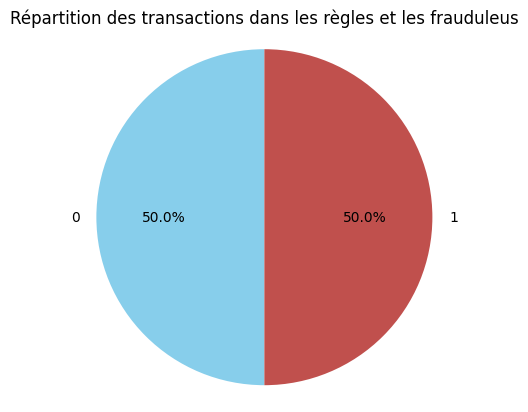

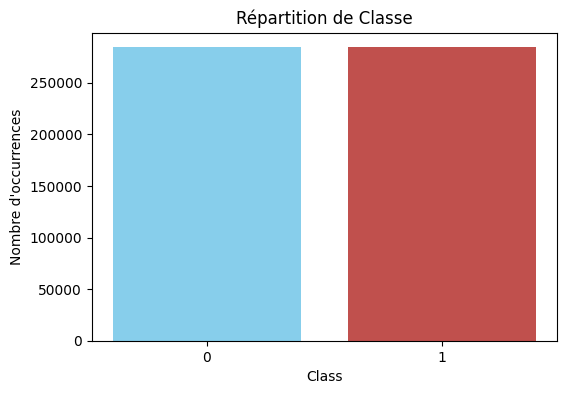

In [11]:
colors = ['skyblue', '#C0504D']

# 1. Graphique en camembert (pie chart)
plt.figure()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Répartition des transactions dans les règles et les frauduleus')
plt.axis('equal')  # Assure que le graphique est circulaire
plt.show()

# 2. Graphique en barres (bar chart)
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index.astype(str), class_counts, color=colors)
plt.title('Répartition de Classe')
plt.xlabel('Class')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=0)  # Aligne les étiquettes sur l'axe x
plt.show()

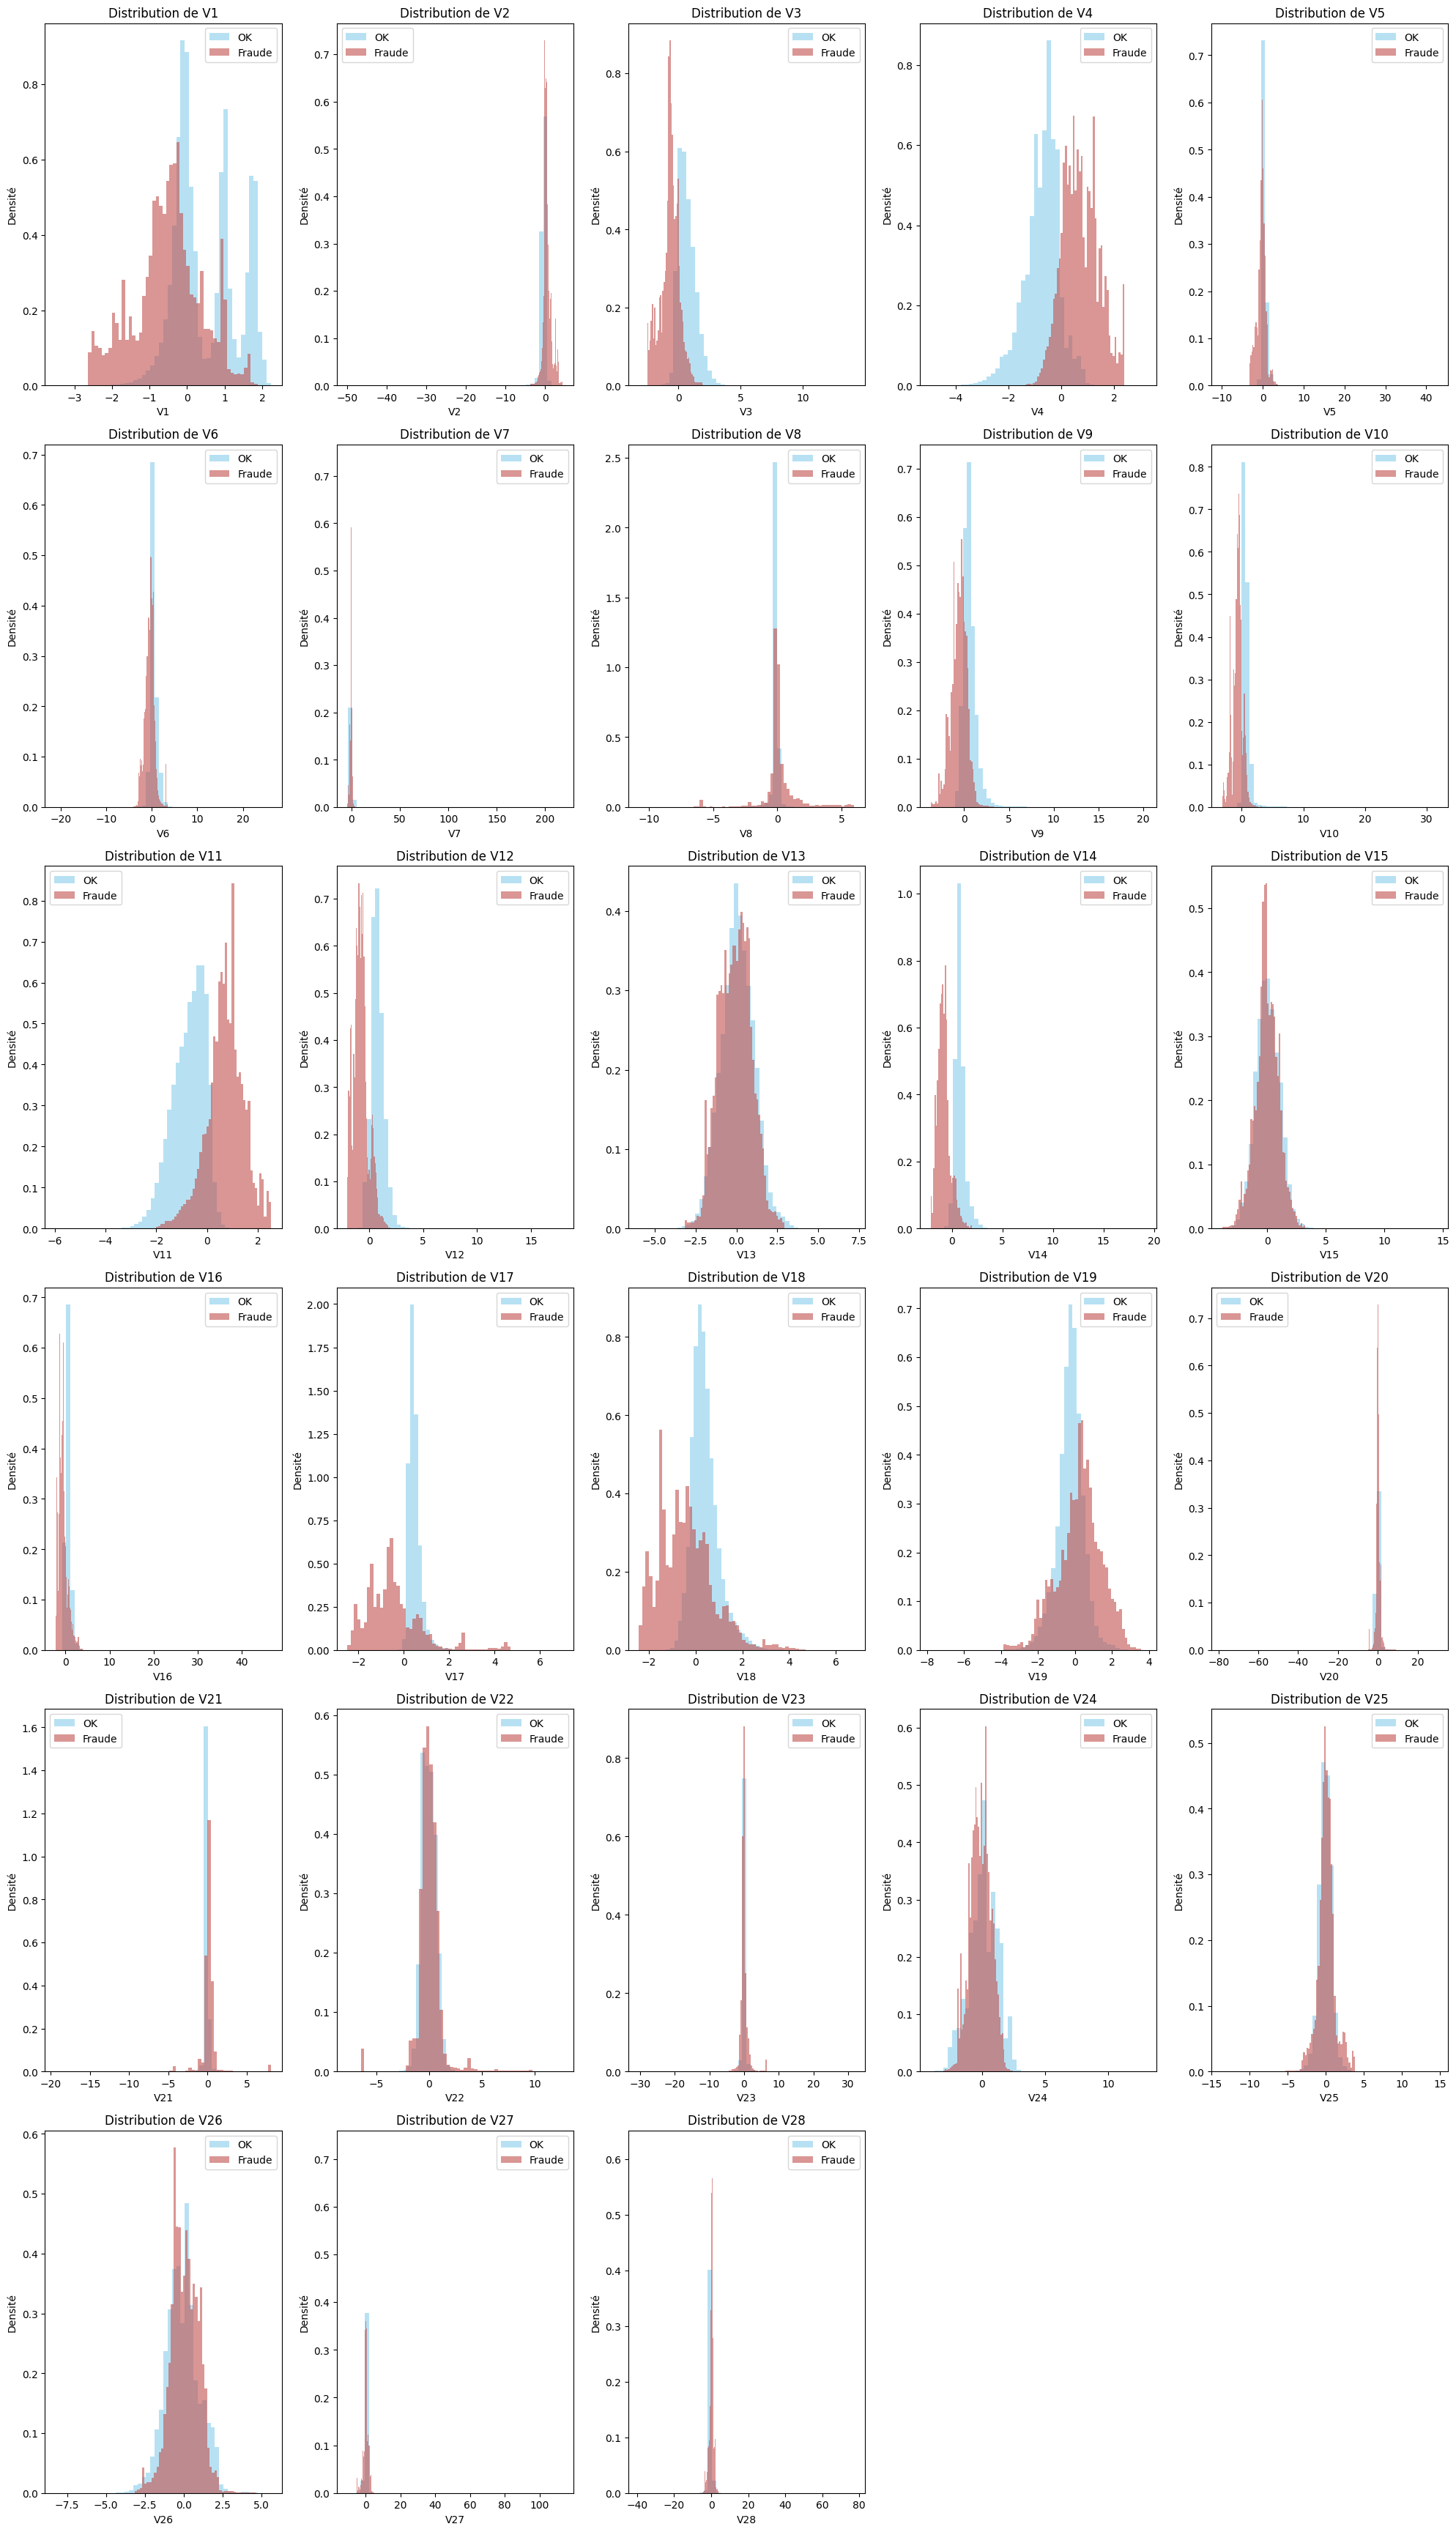

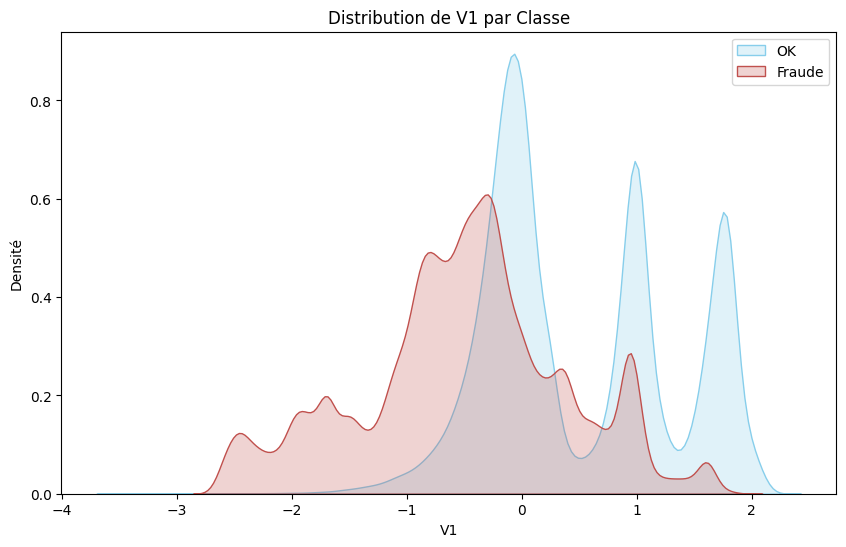

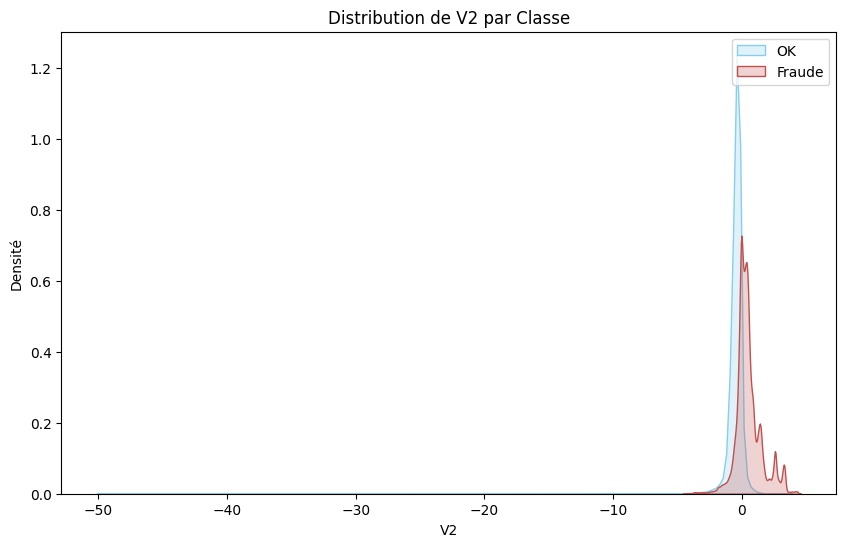

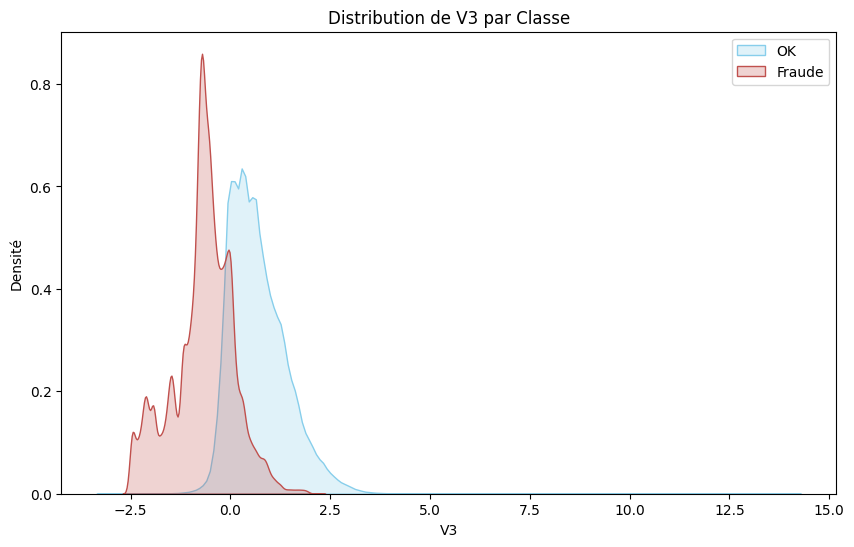

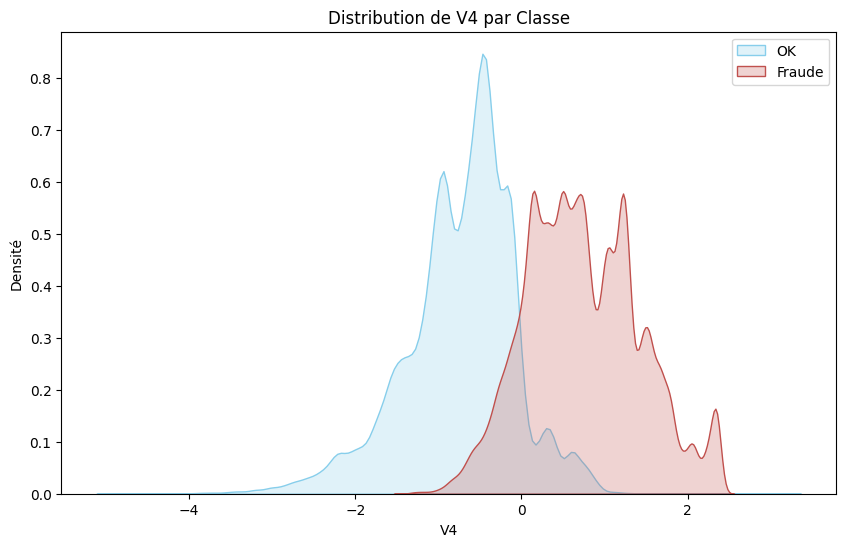

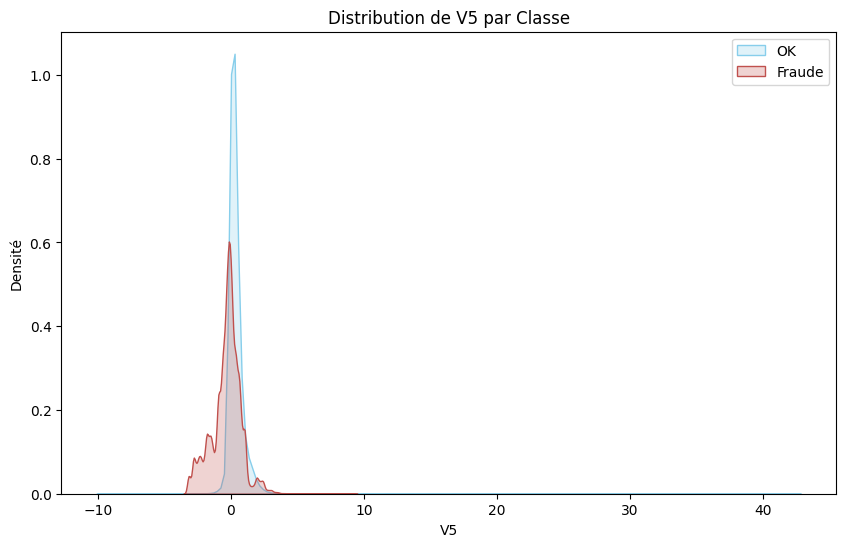

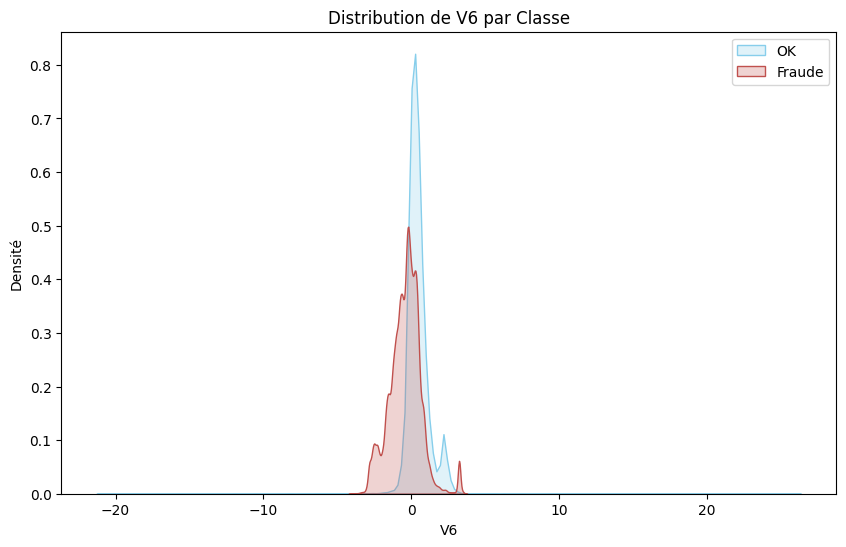

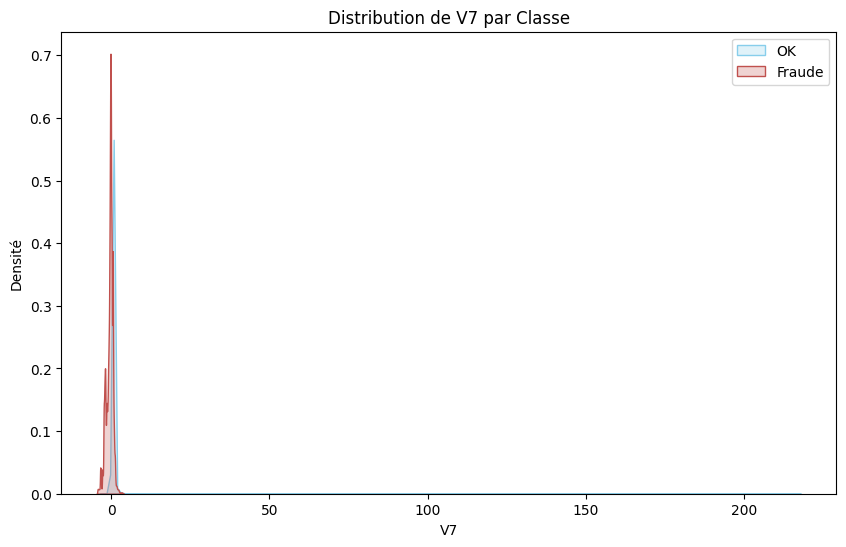

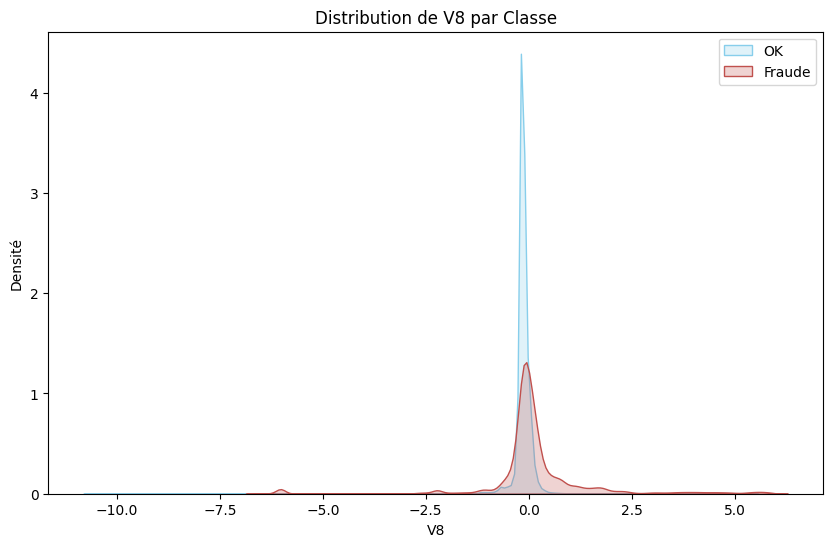

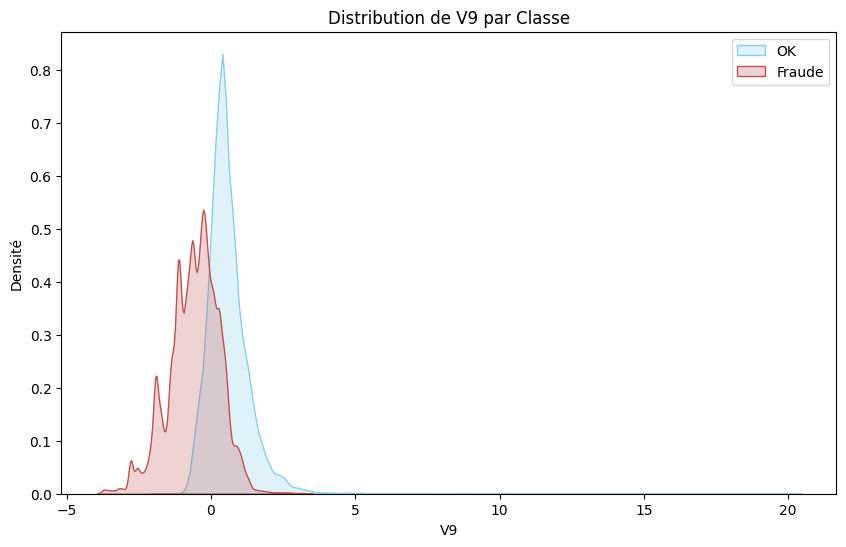

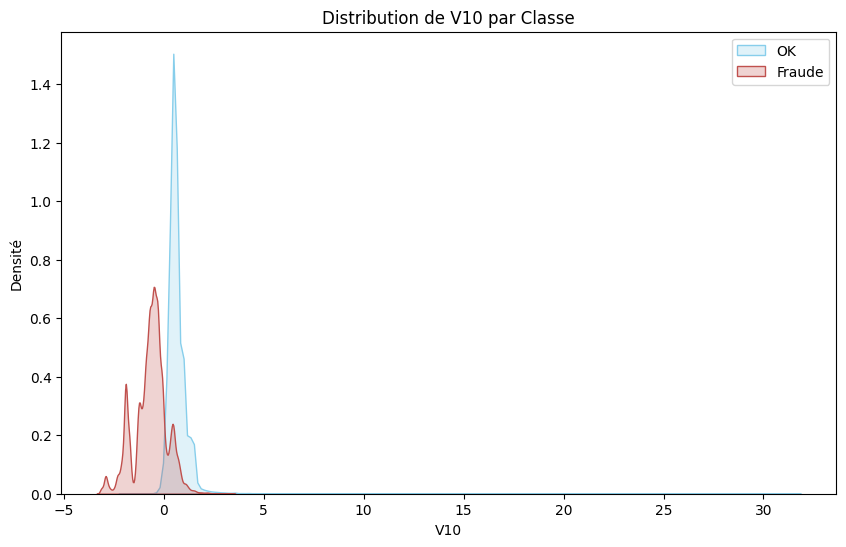

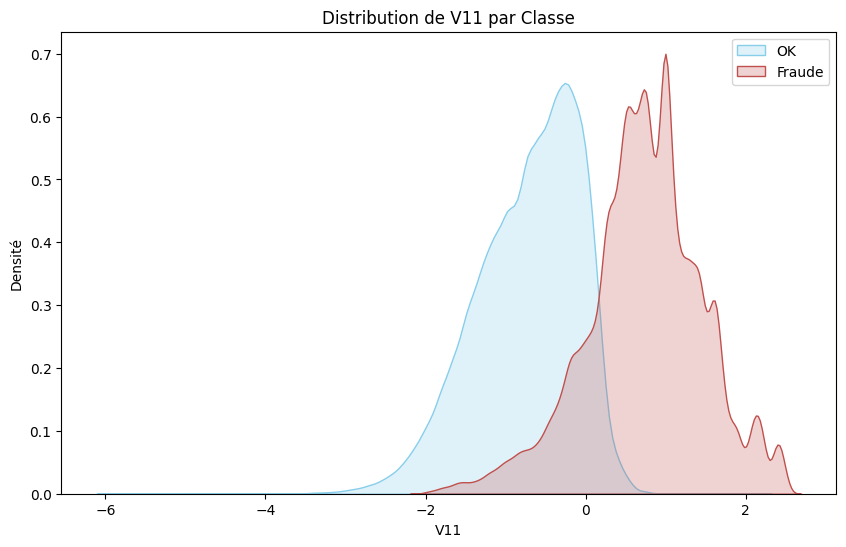

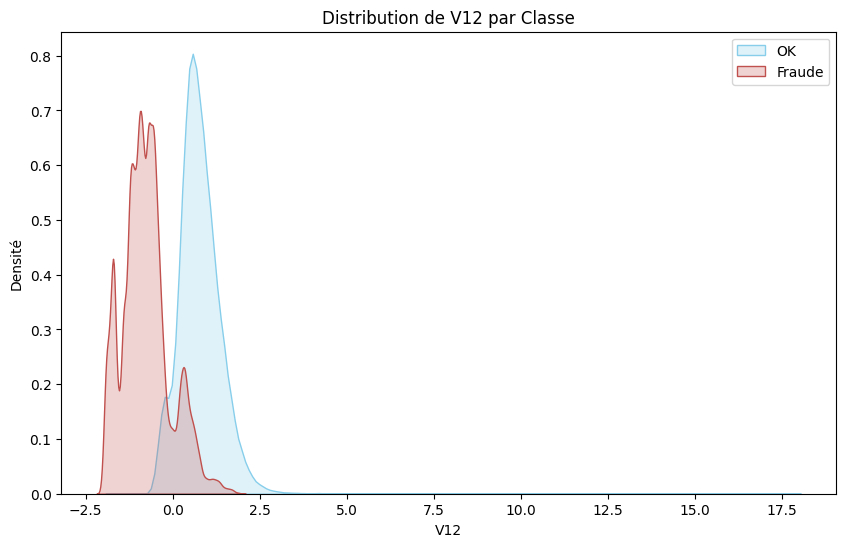

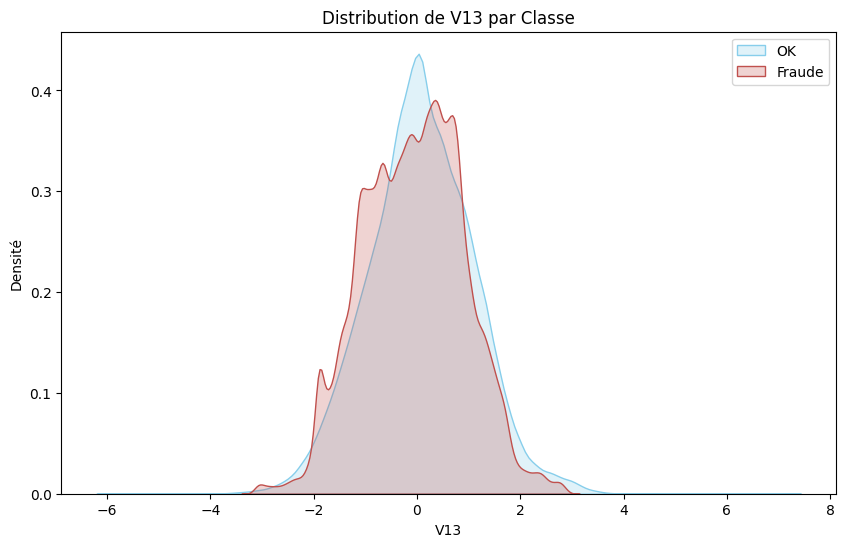

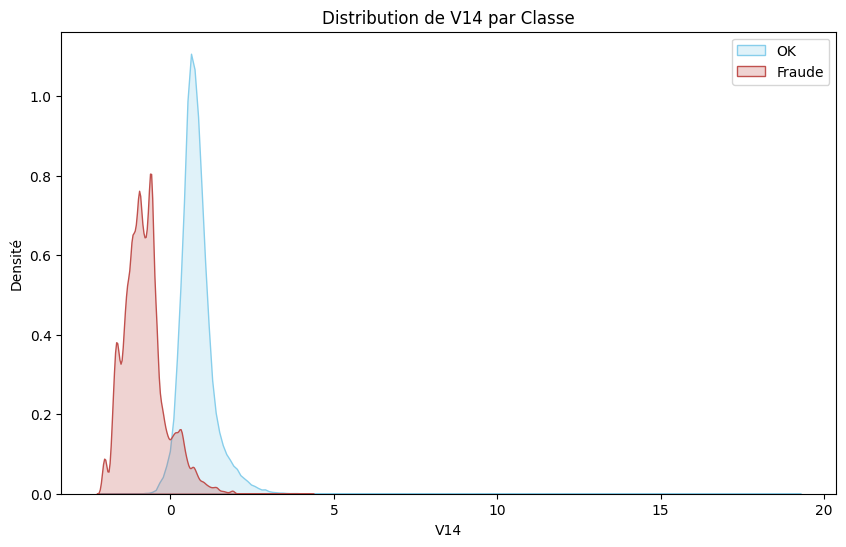

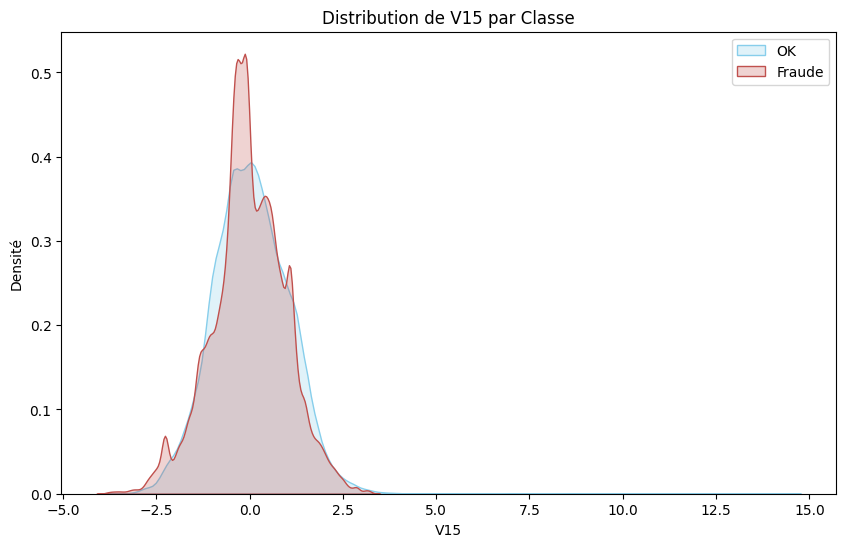

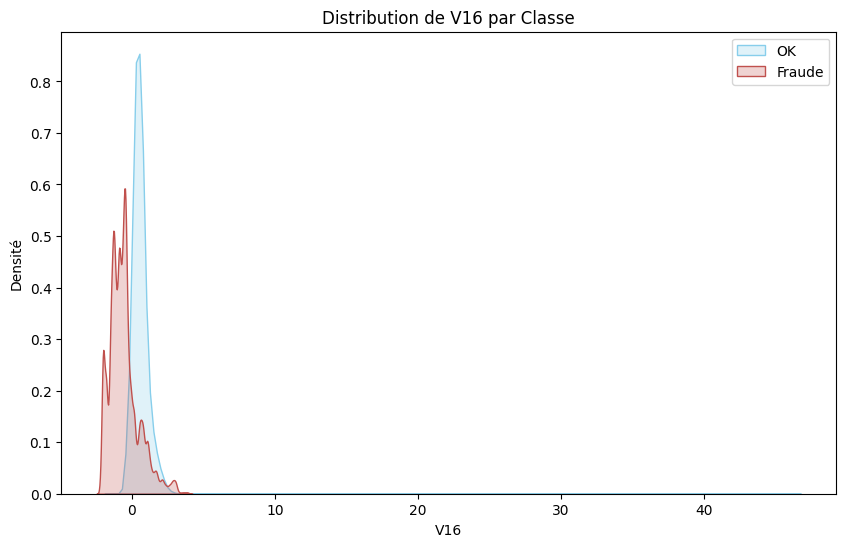

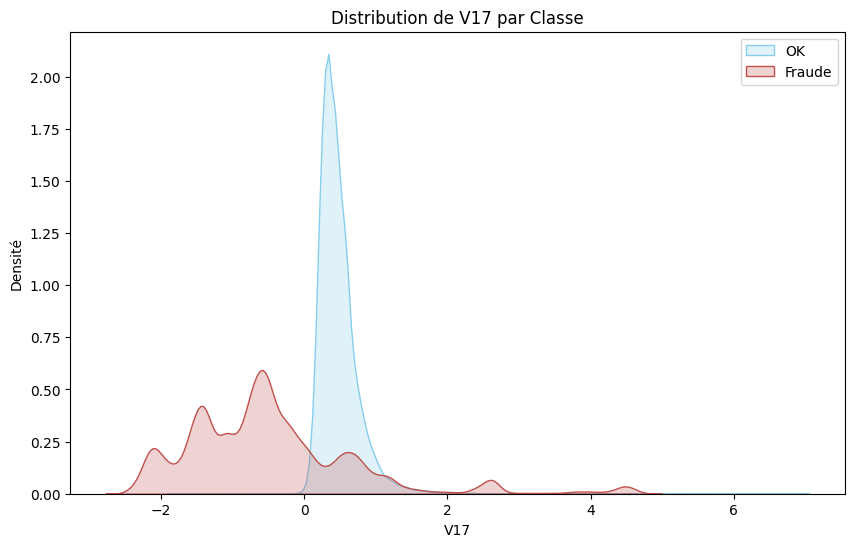

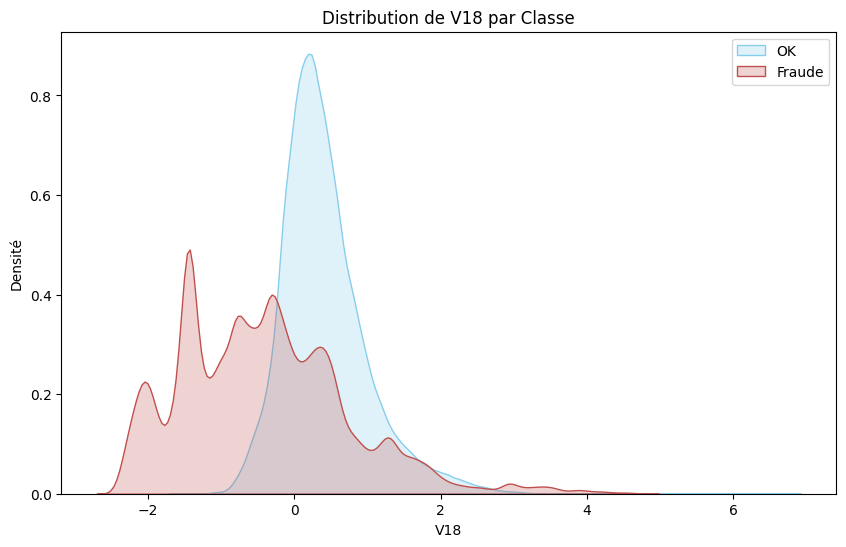

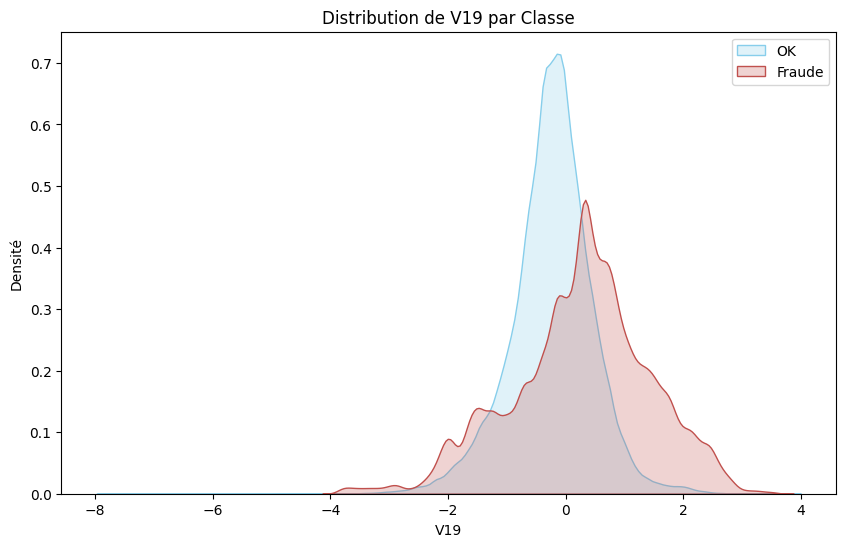

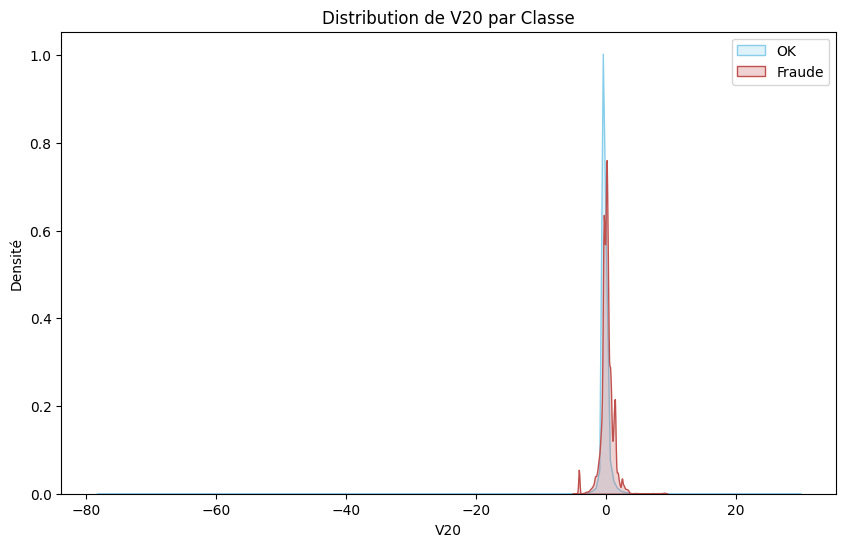

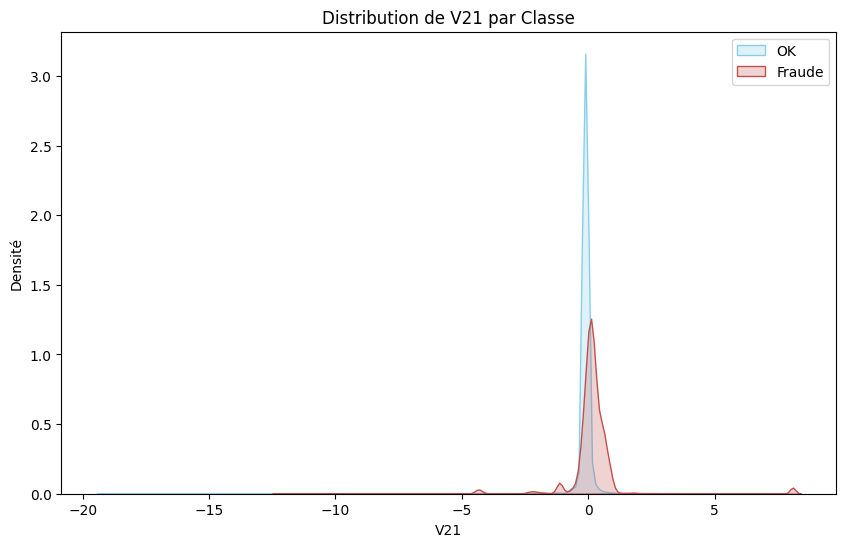

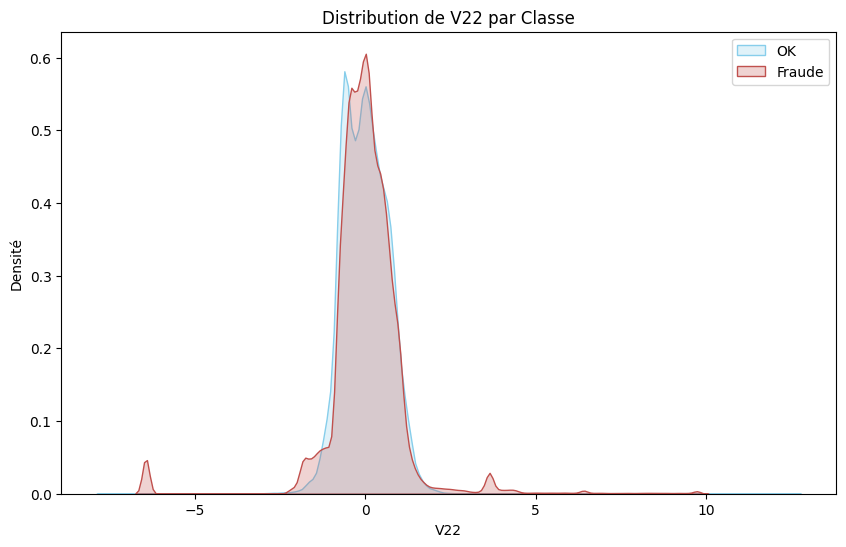

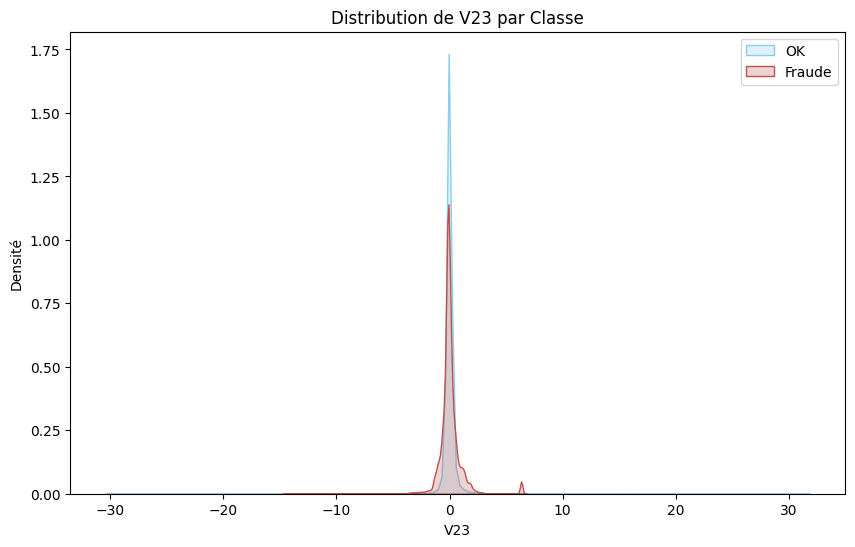

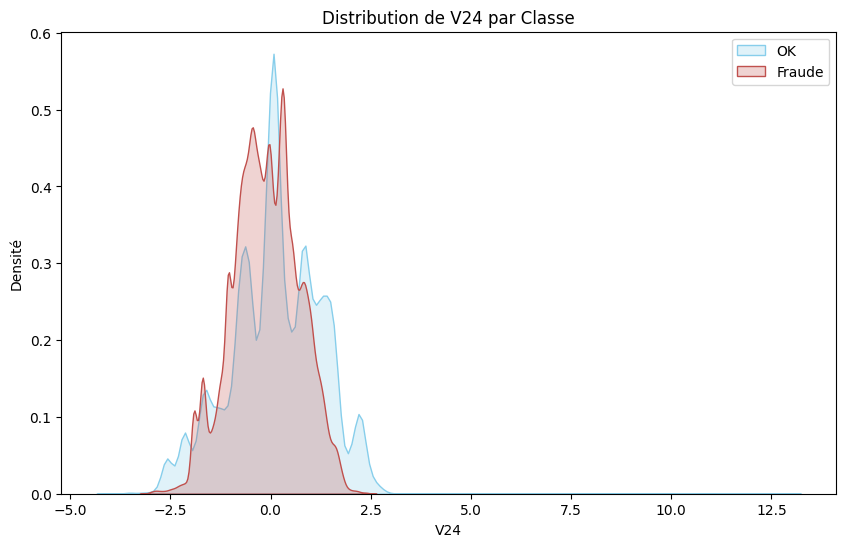

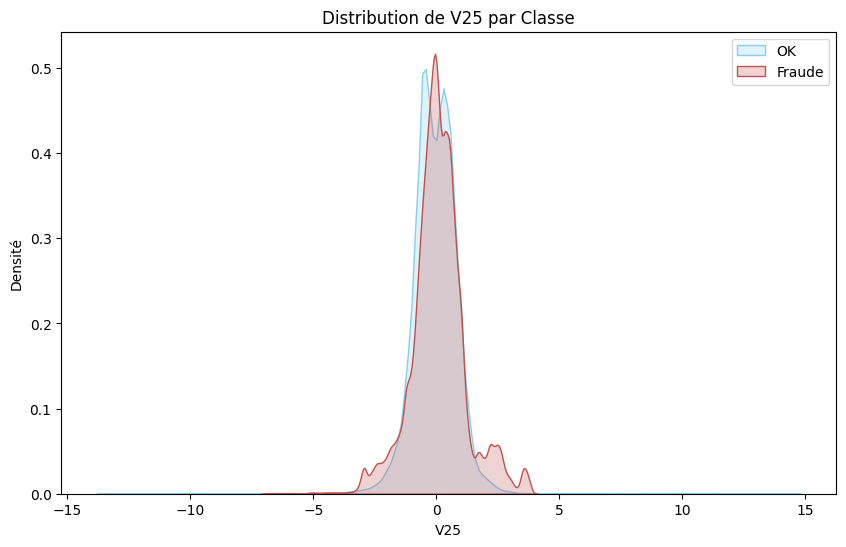

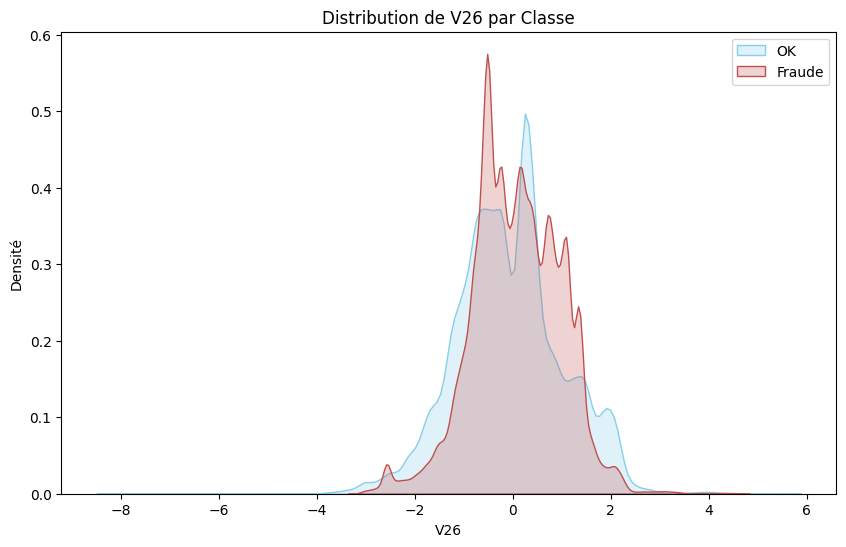

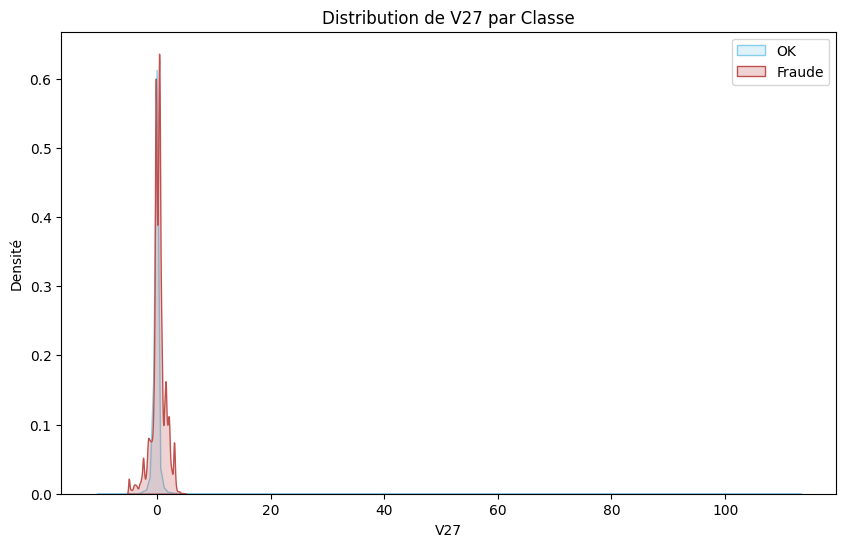

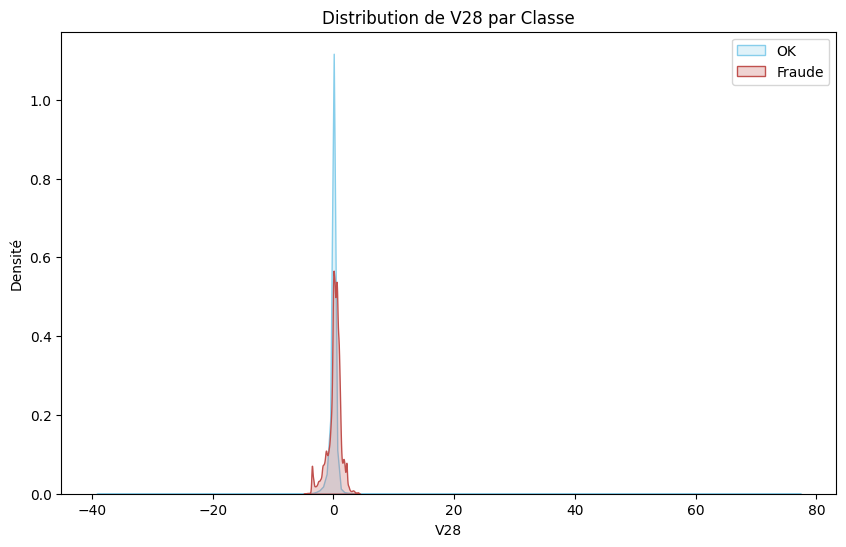

In [12]:
# Séparer les transactions régulières et frauduleuses
class_0 = dataset[dataset['Class'] == 0]
class_1 = dataset[dataset['Class'] == 1]

colors = {'Class 0': 'skyblue', 'Class 1': '#C0504D'}

features = [f'V{i}' for i in range(1, 29)]

plt.figure(figsize=(20, 40))

for i, feature in enumerate(features):
    plt.subplot(7, 5, i + 1) 
    
    # Afficher la distribution pour Class = 0
    plt.hist(class_0[feature], bins=50, color=colors['Class 0'], alpha=0.6, label='OK', density=True)
    
    # Afficher la distribution pour Class = 1
    plt.hist(class_1[feature], bins=50, color=colors['Class 1'], alpha=0.6, label='Fraude', density=True)
    
    plt.title(f'Distribution de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Densité')
    plt.legend()

plt.tight_layout()
plt.show()

variables = [f'V{i}' for i in range(1, 29)]

colors = {0: 'skyblue', 1: '#C0504D'}  # Bleu ciel pour Class = 0, Rouge pour Class = 1

for var in variables:
    plt.figure(figsize=(10, 6))
    
    sns.kdeplot(dataset[dataset['Class'] == 0][var], color=colors[0], label='OK', fill=True)
    sns.kdeplot(dataset[dataset['Class'] == 1][var], color=colors[1], label='Fraude', fill=True)
    
    plt.title(f'Distribution de {var} par Classe')
    plt.legend()
    plt.xlabel(var)
    plt.ylabel('Densité')
    
    plt.show()

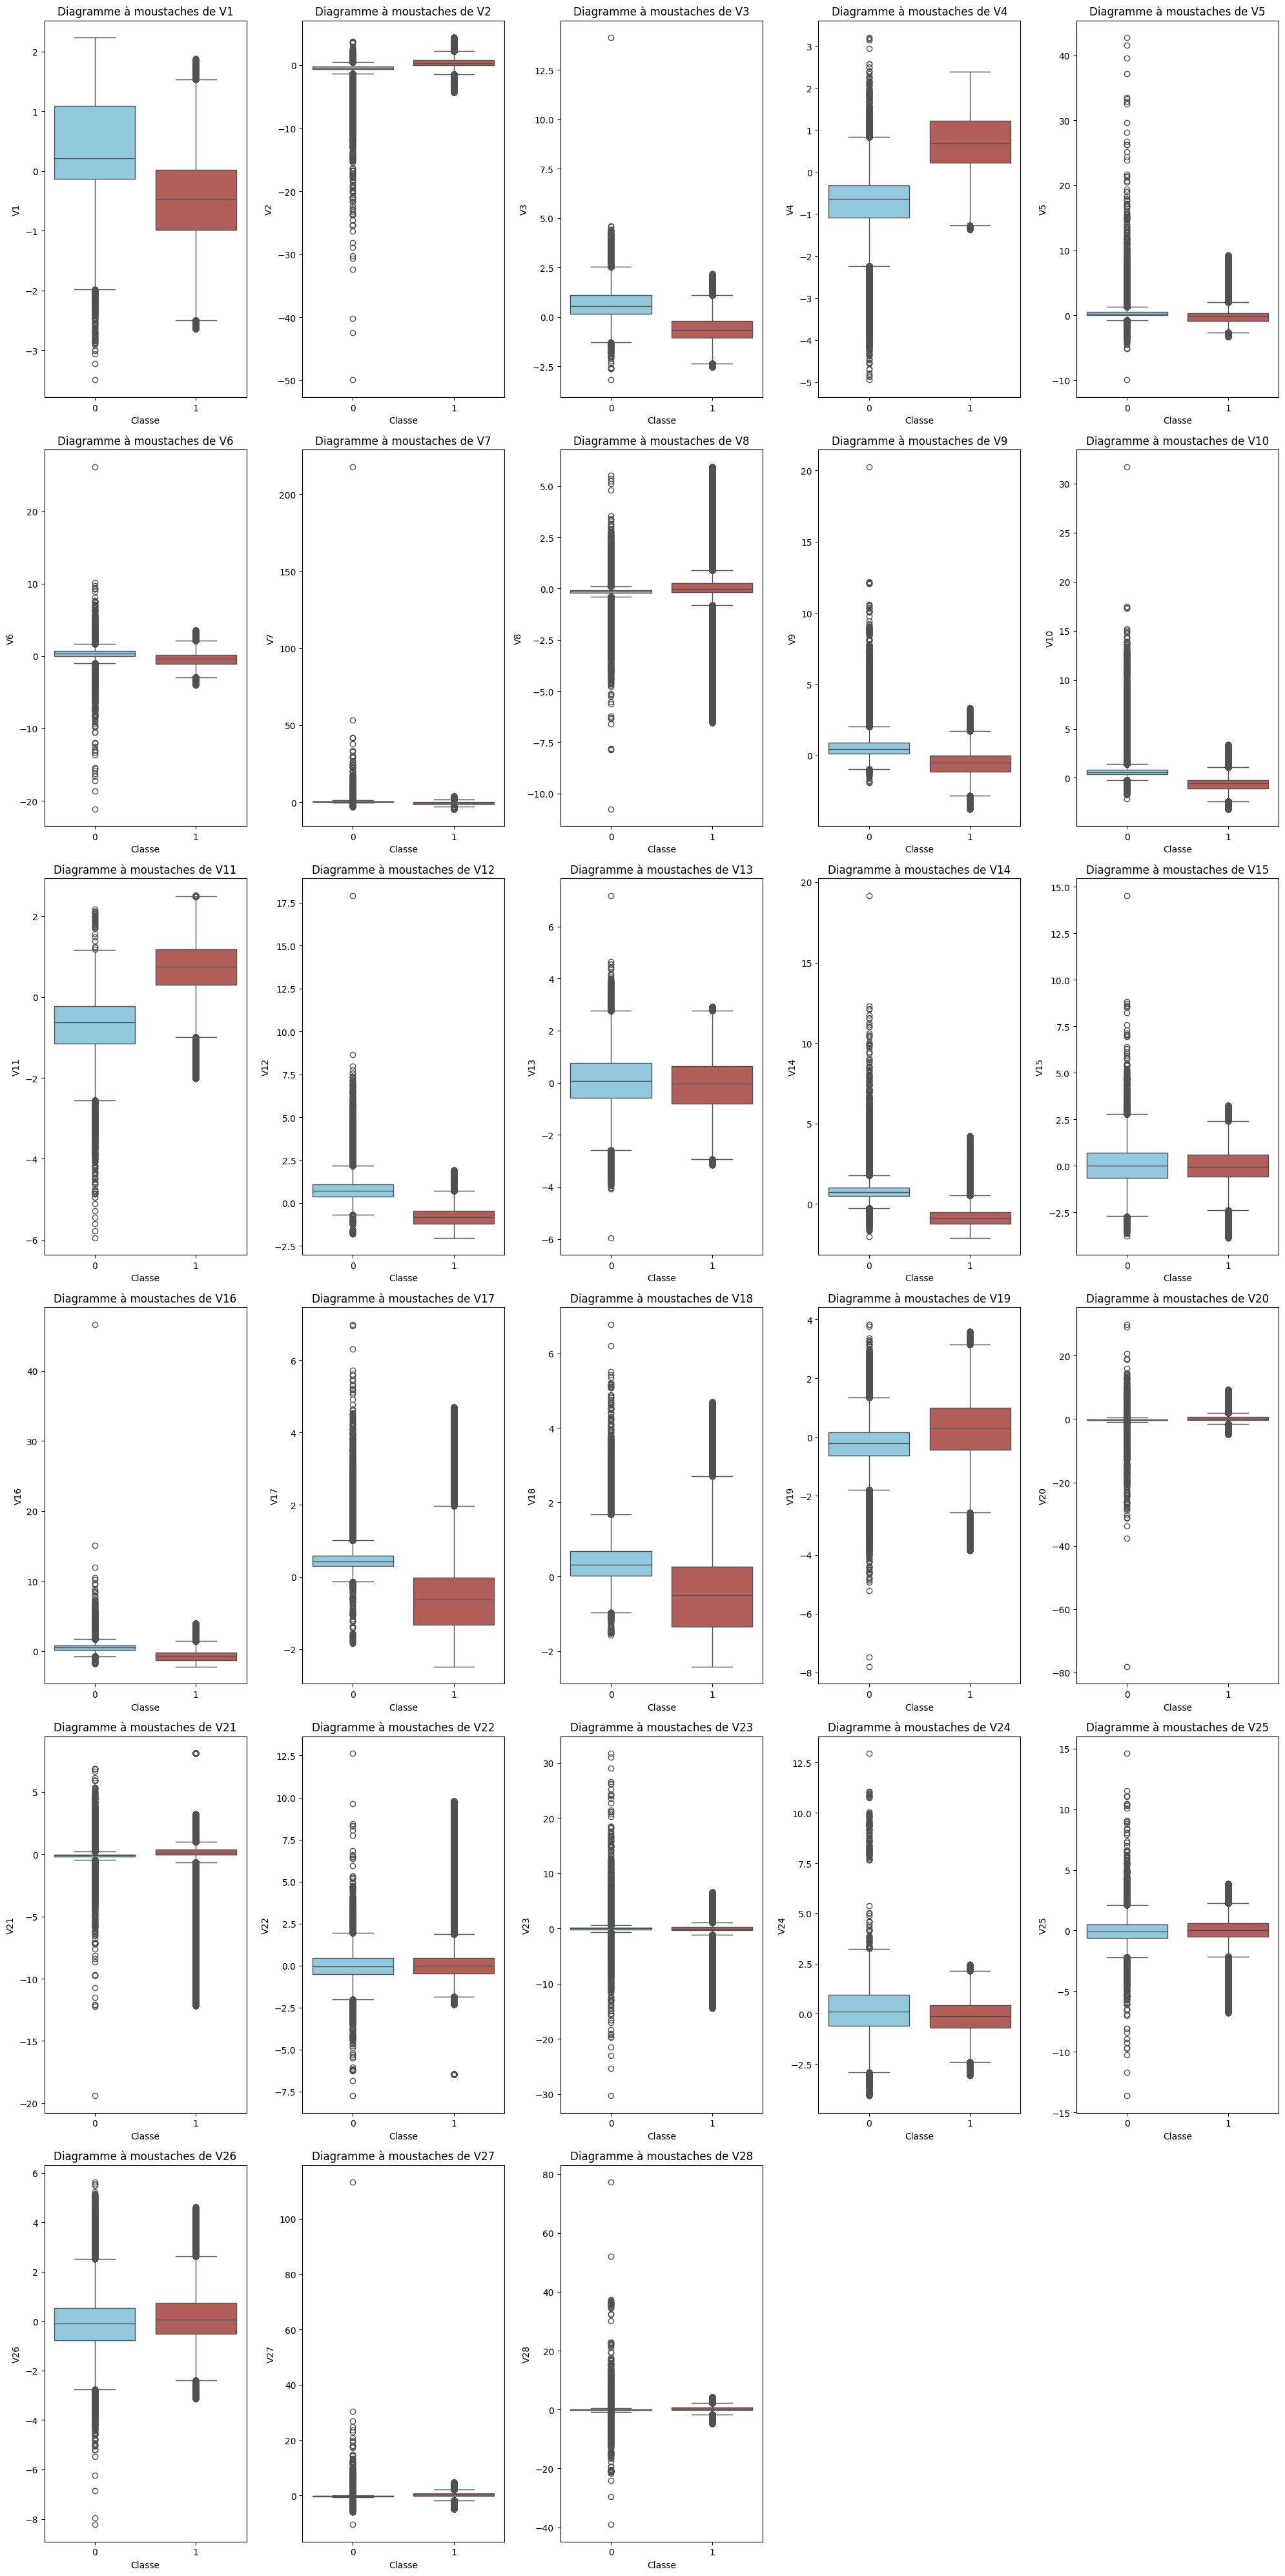

In [17]:
colors = ['skyblue', '#C0504D']

plt.figure(figsize=(20, 40))

for i, var in enumerate(variables):
    plt.subplot(6, 5, i + 1)
    
    sns.boxplot(x='Class', y=var, data=dataset, palette=colors, hue='Class', dodge=False, legend=False)
    
    plt.title(f'Diagramme à moustaches de {var}')
    plt.xlabel('Classe')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


Interprétation des diagrammes :

* Si la boîte est décalée vers le haut ou vers le bas, cela indique une asymétrie dans la distribution (la médiane n'est pas centrée dans l'IQR).
* Une boîte plus large signifie une plus grande dispersion des données autour de la médiane.
* La présence de nombreux points en dehors des moustaches indique un grand nombre de valeurs aberrantes.
* Les différences dans la forme des boîtes entre les classes (0 et 1 dans notre cas) peuvent révéler des différences dans la distribution des variables entre les transactions régulières et les transactions frauduleuses.

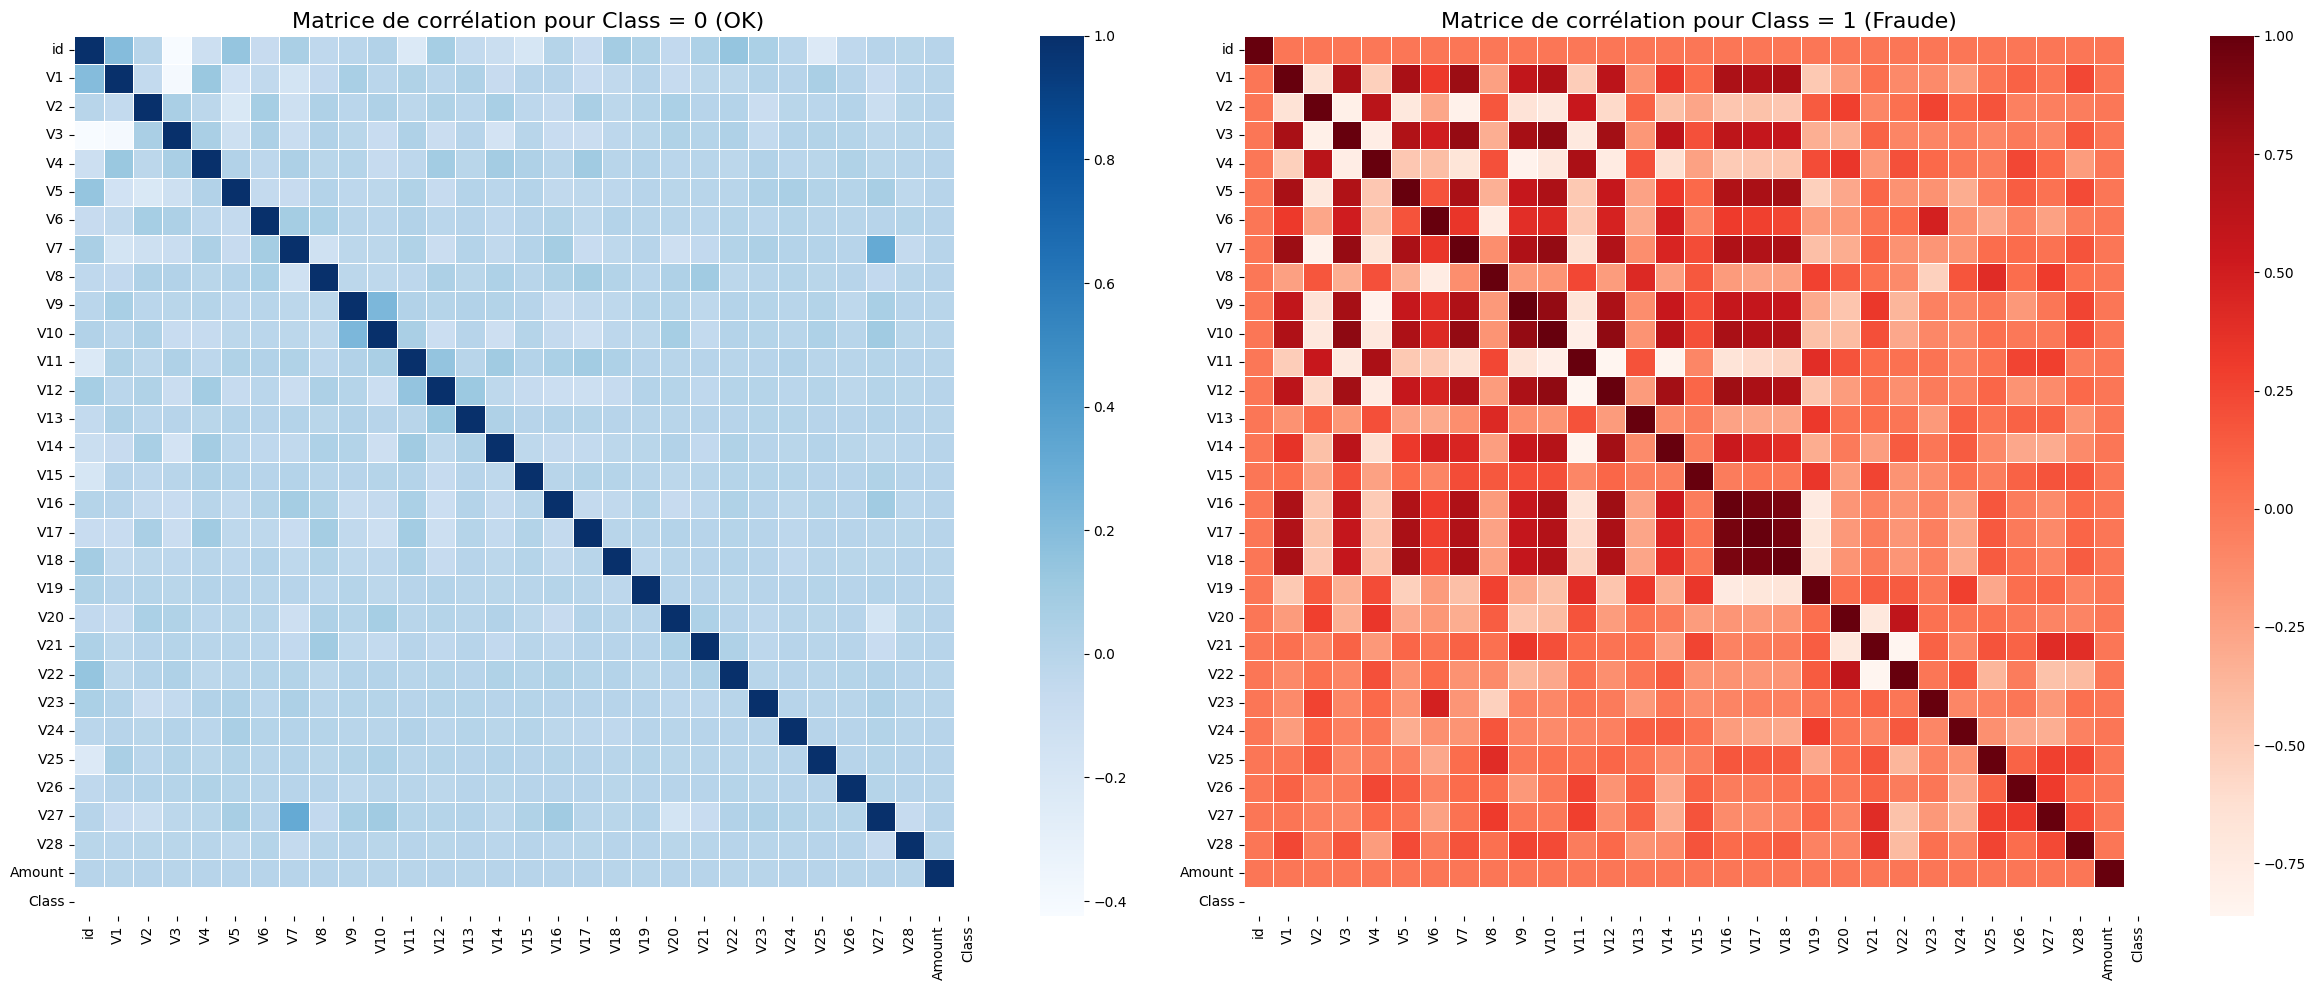

In [14]:
class_0 = dataset[dataset['Class'] == 0]
class_1 = dataset[dataset['Class'] == 1]

corr_class_0 = class_0.corr()
corr_class_1 = class_1.corr()

fig, axes = plt.subplots(1, 2, figsize=(24, 10))

sns.heatmap(corr_class_0, cmap='Blues', ax=axes[0], annot=False, linewidths=0.5)
axes[0].set_title("Matrice de corrélation pour Class = 0 (OK)", fontsize=16)

sns.heatmap(corr_class_1, cmap='Reds', ax=axes[1], annot=False, linewidths=0.5)
axes[1].set_title("Matrice de corrélation pour Class = 1 (Fraude)", fontsize=16)

plt.tight_layout()
plt.show()

Si on veux coder la matrice de corrélation, on peux le faire en calculant manuellement les coefficients de corrélation de Pearson pour chaque paire de variables.

Étapes pour calculer une matrice de corrélation :

* Normaliser les données (soustraire la moyenne et diviser par l'écart-type pour chaque colonne).
* Calculer le produit des normalisations pour chaque paire de variables.
* Moyenne de ces produits pour obtenir le coefficient de corrélation.

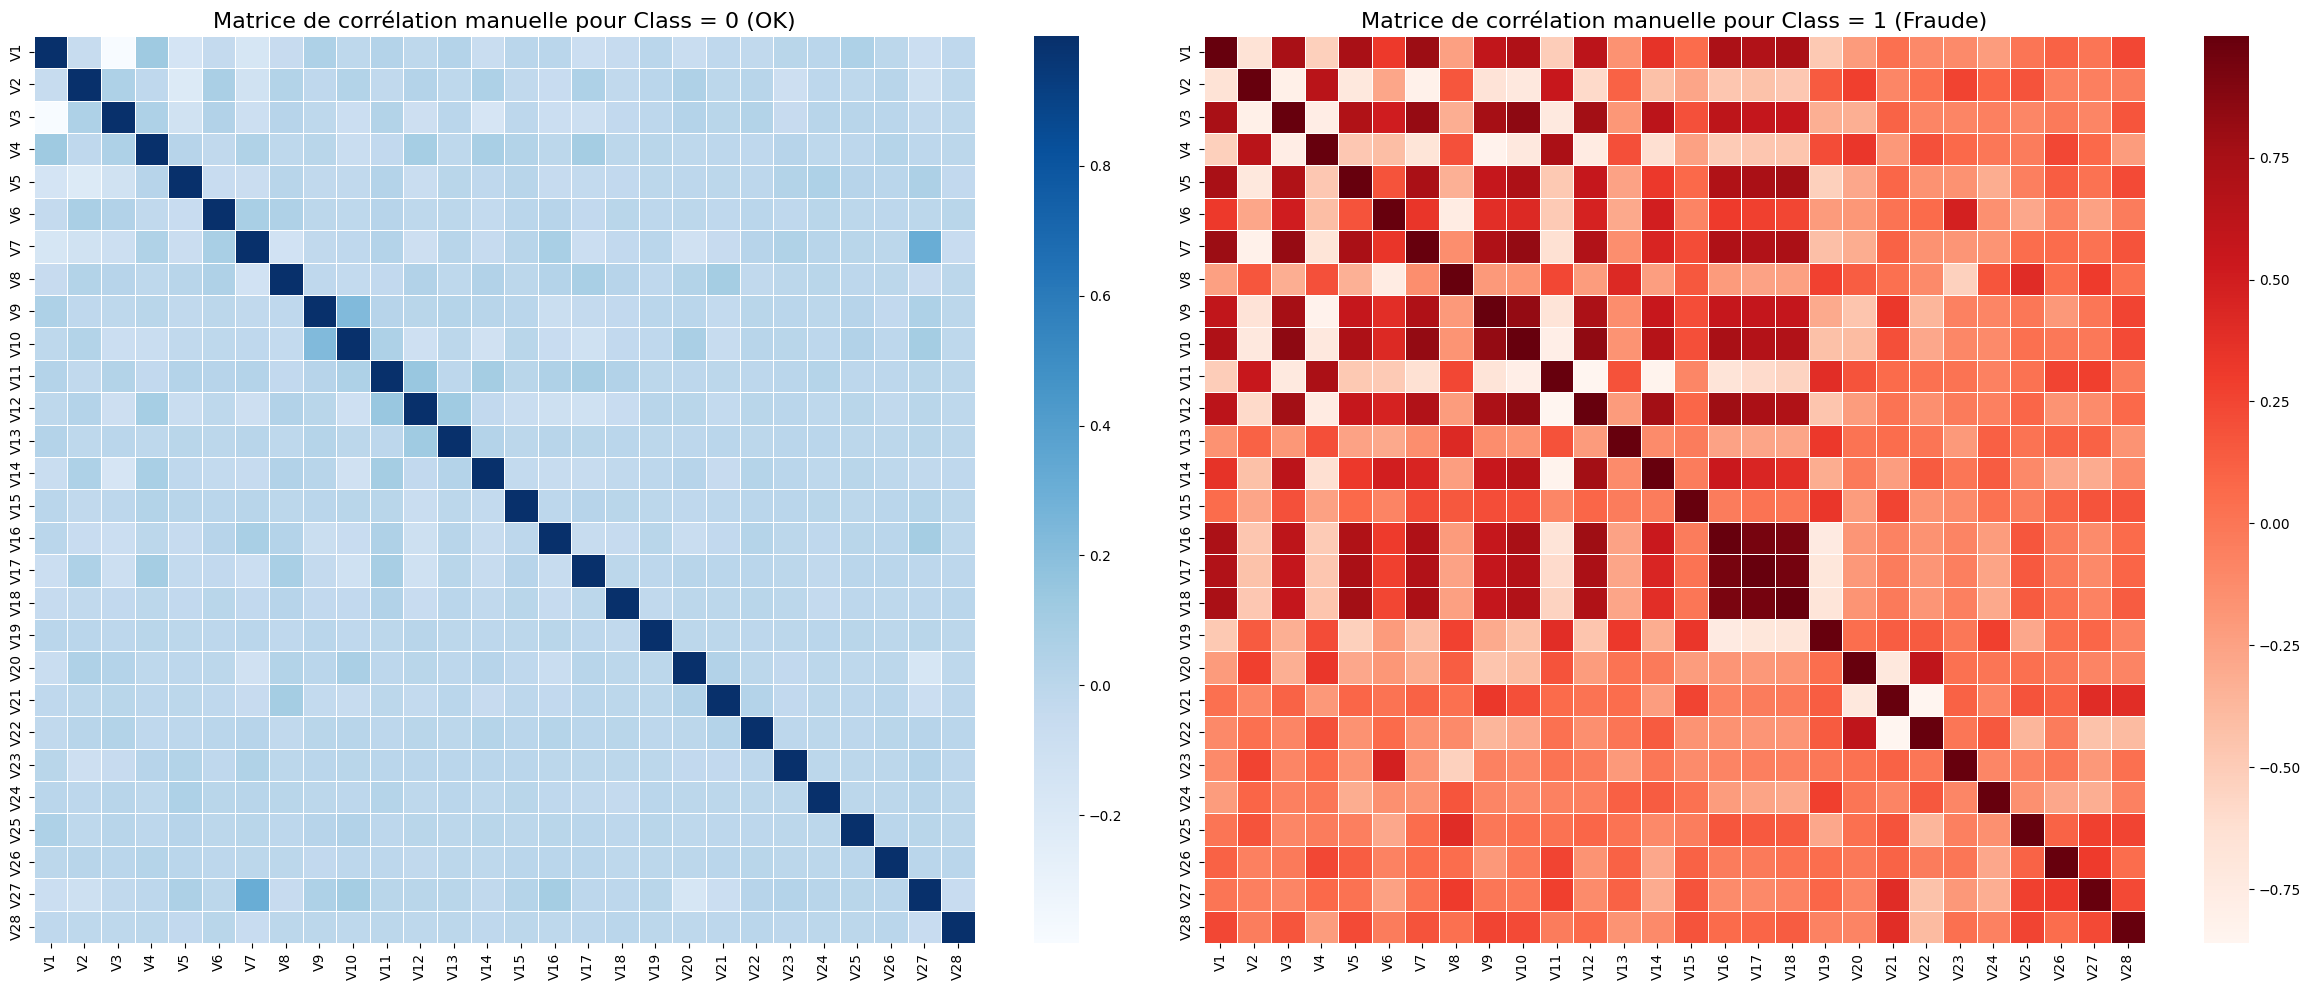

In [15]:
import numpy as np
import pandas as pd

def calculate_correlation_matrix(data):
    # Initialisation de la matrice vide
    n = data.shape[1]
    correlation_matrix = np.zeros((n, n))
    
    # Calcul de la moyenne et de l'écart-type pour chaque colonne
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0, ddof=1)  # ddof=1 pour l'écart-type corrigé (échantillon)
    
    # Remplir la matrice de corrélation
    for i in range(n):
        for j in range(n):
            # Calcul du coefficient de corrélation de Pearson entre les colonnes i et j
            covariance = np.mean((data[:, i] - means[i]) * (data[:, j] - means[j]))
            correlation = covariance / (stds[i] * stds[j])
            correlation_matrix[i, j] = correlation
    
    return correlation_matrix

# Extraction des données des variables
data_class_0 = class_0[features].values
data_class_1 = class_1[features].values

# Calcul manuel des matrices de corrélation
manual_corr_class_0 = calculate_correlation_matrix(data_class_0)
manual_corr_class_1 = calculate_correlation_matrix(data_class_1)

# Conversion en DataFrame pour faciliter l'affichage avec les noms des colonnes
manual_corr_class_0_df = pd.DataFrame(manual_corr_class_0, index=features, columns=features)
manual_corr_class_1_df = pd.DataFrame(manual_corr_class_1, index=features, columns=features)

# Affichage des résultats
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

sns.heatmap(manual_corr_class_0_df, cmap='Blues', ax=axes[0], annot=False, linewidths=0.5)
axes[0].set_title("Matrice de corrélation manuelle pour Class = 0 (OK)", fontsize=16)

sns.heatmap(manual_corr_class_1_df, cmap='Reds', ax=axes[1], annot=False, linewidths=0.5)
axes[1].set_title("Matrice de corrélation manuelle pour Class = 1 (Fraude)", fontsize=16)

plt.tight_layout()
plt.show()
